In [26]:
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
df = pd.read_csv('data/alder.csv', sep=";")

In [28]:
df.head()

,År,Mors fødealder første barn,Fars fødealder første barn
0,1961,24.6,28.2
1,1962,24.3,27.9
2,1963,24.0,27.5
3,1964,23.8,27.2
4,1965,23.6,26.9


In [29]:
df.describe()

,År,Mors fødealder første barn,Fars fødealder første barn
count,61.000000,61.000000,61.000000
mean,1991.000000,26.057377,28.811475
std,17.752934,2.161362,2.015531
min,1961.000000,23.200000,25.900000
25%,1976.000000,24.100000,27.100000
50%,1991.000000,25.700000,28.400000
75%,2006.000000,28.100000,30.800000
max,2021.000000,30.100000,32.100000


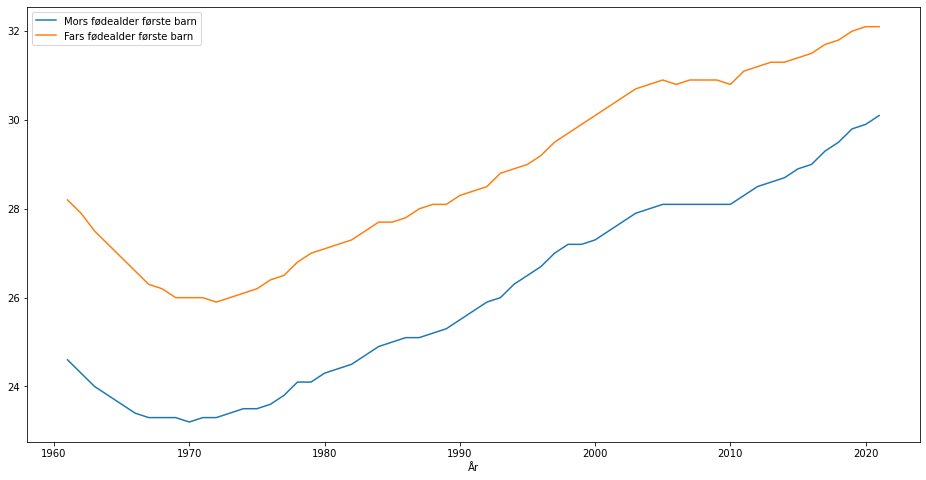

In [30]:
plt.rcParams["figure.figsize"] = (16, 8)
df.plot(x='År', y=['Mors fødealder første barn', 'Fars fødealder første barn'])
plt.show()

Lager nye kolonne med differansen

In [31]:
df["Differanse"] = df["Fars fødealder første barn"] - df["Mors fødealder første barn"]
df

,År,Mors fødealder første barn,Fars fødealder første barn,Differanse
0,1961,24.6,28.2,3.6
1,1962,24.3,27.9,3.6
2,1963,24.0,27.5,3.5
3,1964,23.8,27.2,3.4
4,1965,23.6,26.9,3.3
...,...,...,...,...
56,2017,29.3,31.7,2.4
57,2018,29.5,31.8,2.3
58,2019,29.8,32.0,2.2
59,2020,29.9,32.1,2.2


Ser på grafen til ddifferansen

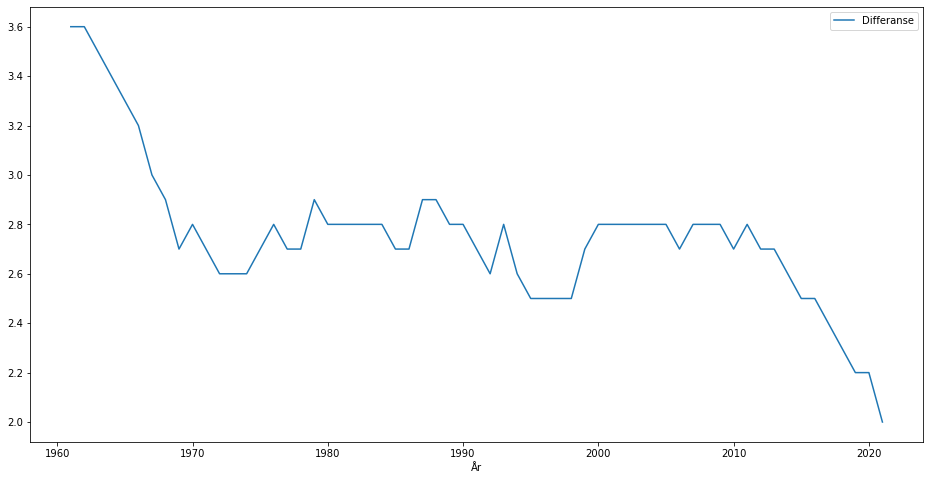

In [32]:
df.plot(x='År', y="Differanse")
plt.show()

Ser på endringen (Deriverer)

In [33]:
mor = df["Mors fødealder første barn"]
år = df["År"]
der = [0]
for i in range(len(mor)-1):
    der.append((mor[i+1]-mor[i])/(år[i+1]-år[i]))
    
df["Derivert Mor"] = der
df

,År,Mors fødealder første barn,Fars fødealder første barn,Differanse,Derivert Mor
0,1961,24.6,28.2,3.6,0.0
1,1962,24.3,27.9,3.6,-0.3
2,1963,24.0,27.5,3.5,-0.3
3,1964,23.8,27.2,3.4,-0.2
4,1965,23.6,26.9,3.3,-0.2
...,...,...,...,...,...
56,2017,29.3,31.7,2.4,0.3
57,2018,29.5,31.8,2.3,0.2
58,2019,29.8,32.0,2.2,0.3
59,2020,29.9,32.1,2.2,0.1


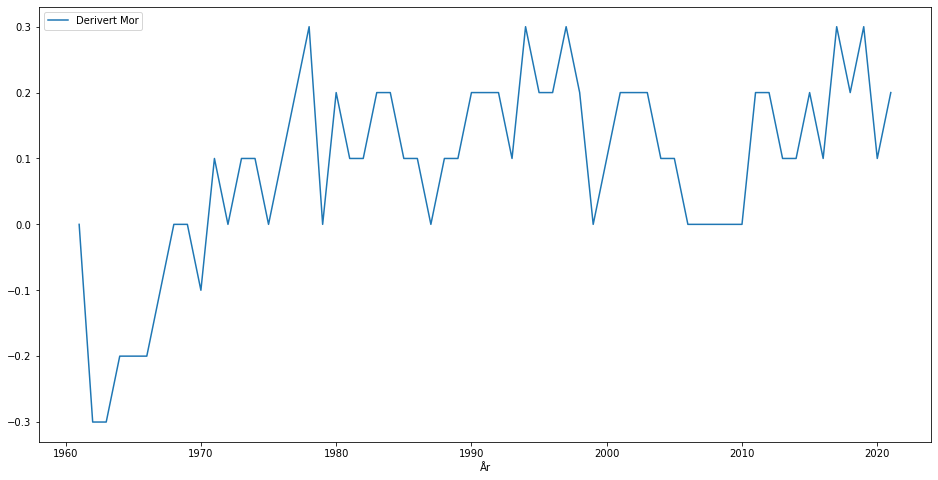

In [34]:
df.plot(x='År', y="Derivert Mor")
plt.show()

In [35]:
far = df["Fars fødealder første barn"]
år = df["År"]
der = [0]
for i in range(len(far)-1):
    der.append((far[i+1]-far[i])/(år[i+1]-år[i]))
    
df["Derivert Far"] = der
df

,År,Mors fødealder første barn,Fars fødealder første barn,Differanse,Derivert Mor,Derivert Far
0,1961,24.6,28.2,3.6,0.0,0.0
1,1962,24.3,27.9,3.6,-0.3,-0.3
2,1963,24.0,27.5,3.5,-0.3,-0.4
3,1964,23.8,27.2,3.4,-0.2,-0.3
4,1965,23.6,26.9,3.3,-0.2,-0.3
...,...,...,...,...,...,...
56,2017,29.3,31.7,2.4,0.3,0.2
57,2018,29.5,31.8,2.3,0.2,0.1
58,2019,29.8,32.0,2.2,0.3,0.2
59,2020,29.9,32.1,2.2,0.1,0.1


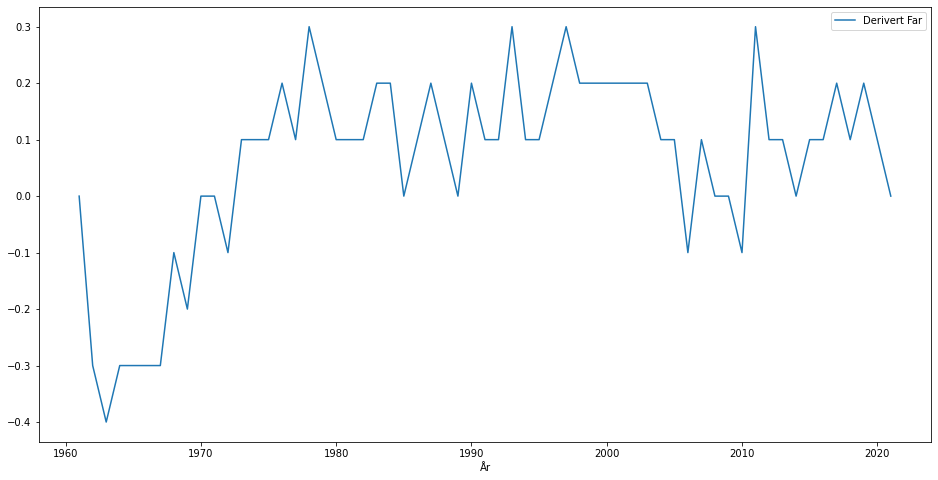

In [36]:
df.plot(x='År', y="Derivert Far")
plt.show()

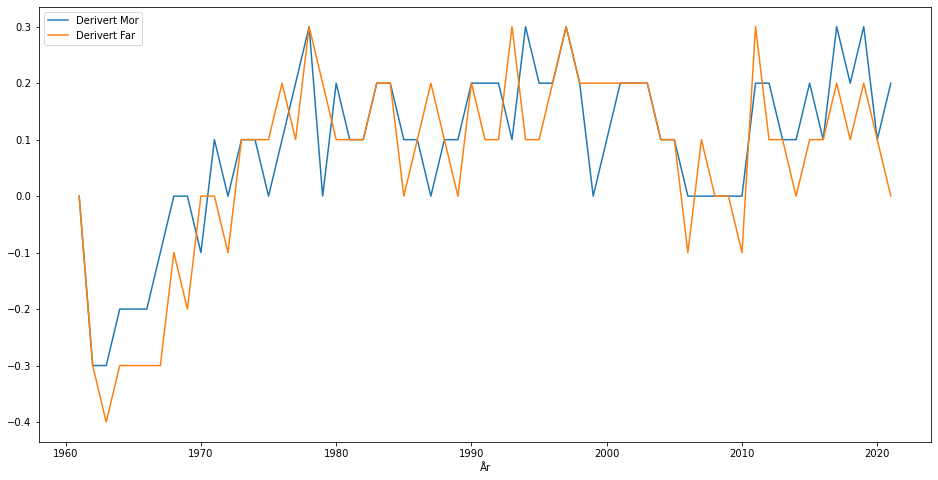

In [37]:
df.plot(x='År', y=["Derivert Mor", "Derivert Far"])
plt.show()

## Modell
Hva skjer frem i tid?

Vi starter med å avgjøre hvilken funksjon vi skal prøve å tilpasse dataene.


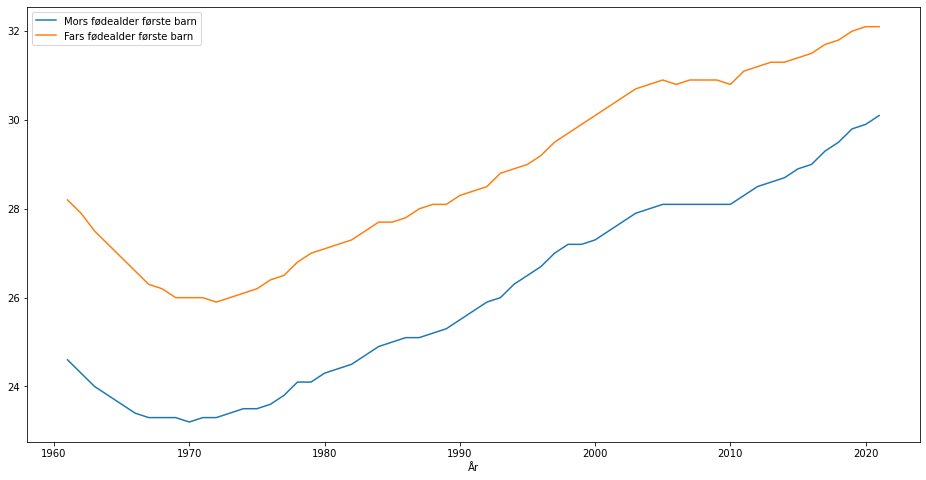

In [38]:
df.plot(x='År', y=['Mors fødealder første barn', 'Fars fødealder første barn'])
plt.show()

I dette tilfellet fungerer en 3. grads polynomfunksjon ok, men vi vet at den blir svært dårlig bare noen år etter siste datapunkt.

In [40]:
import numpy as np

np.polyfit(df["År"], df["Mors fødealder første barn"], 3)

array([-7.76413547e-05,  4.64919827e-01, -9.27819636e+02,  6.17117988e+05])

Den gir oss 4 parametere a,b,c og d til $ax^3+bx^2+cx+d$

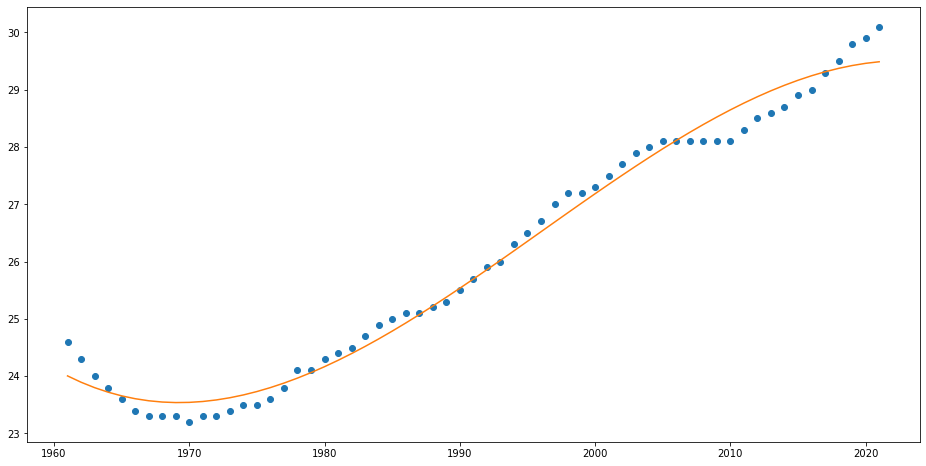

In [44]:
a, b, c, d = np.polyfit(df["År"], df["Mors fødealder første barn"], 3)
x = df["År"]
plt.plot(x, df["Mors fødealder første barn"], "0")
plt.plot(x, a*x**3+b*x**2+c*x+d)
plt.show()

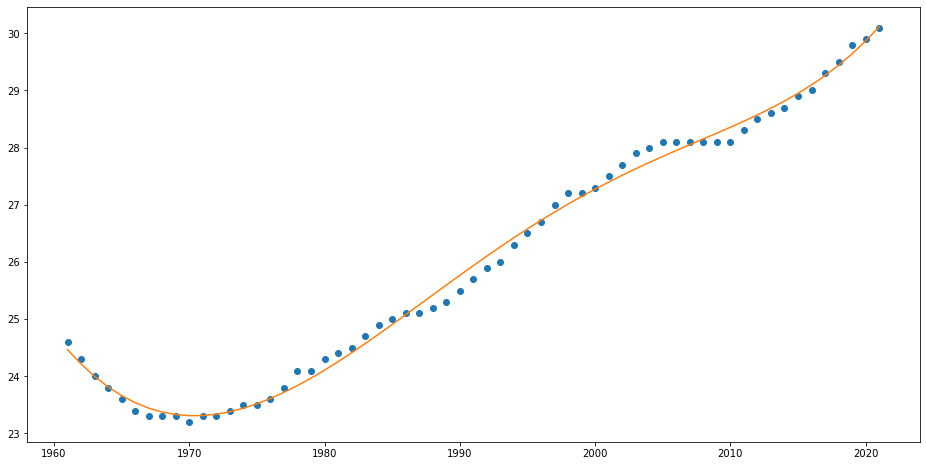

In [75]:
a, b, c, d, e, f = np.polyfit(df["År"], df["Mors fødealder første barn"], 5)
x = df["År"]
plt.plot(x, df["Mors fødealder første barn"], "o")
plt.plot(x, a*x**5+b*x**4+c*x**3+d*x**2+e*x+f)
plt.show()

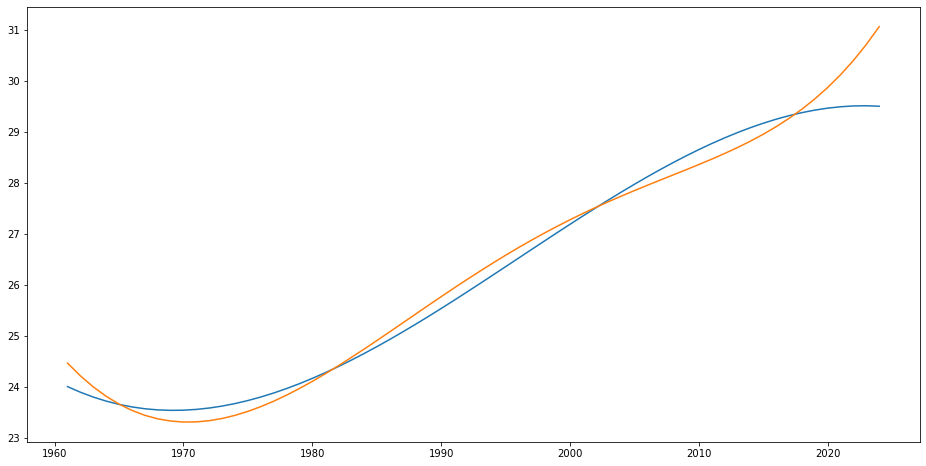

In [100]:
x_modell = np.arange(1961, 2025)
a, b, c, d = np.polyfit(df["År"], df["Mors fødealder første barn"], 3)
plt.plot(x_modell, a*x_modell**3+b*x_modell**2+c*x_modell+d)

a, b, c, d, e, f = np.polyfit(df["År"], df["Mors fødealder første barn"], 5)
plt.plot(x_modell, a*x_modell**5+b*x_modell**4+c*x_modell**3+d*x_modell**2+e*x_modell+f)
plt.show()

Vi ser at begge modellene fungerer svært dårlig frem i tid. Vi kunne prøvd oss på en lineær modell fra 1972 og utover og sw

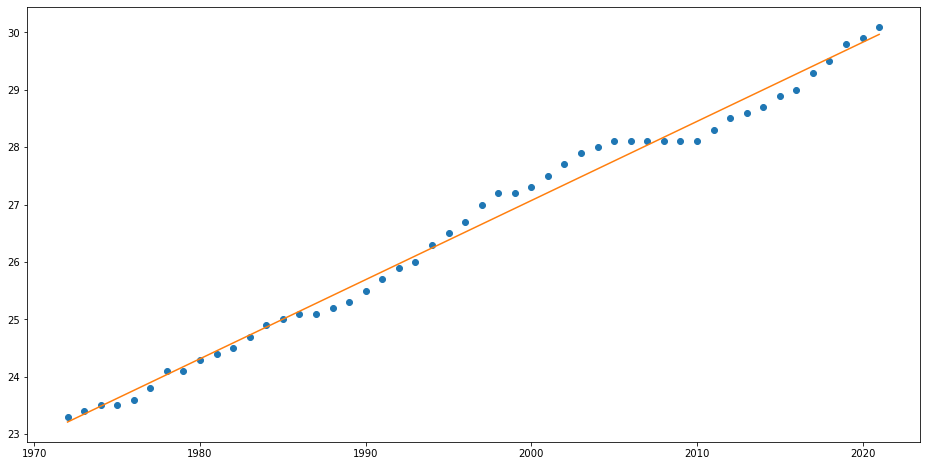

In [101]:
x = df["År"][11:]
y = df["Mors fødealder første barn"][11:]

plt.plot(x,y, "o")

a, b = np.polyfit(x, y, 1)

plt.plot(x, a*x+b)
plt.show()

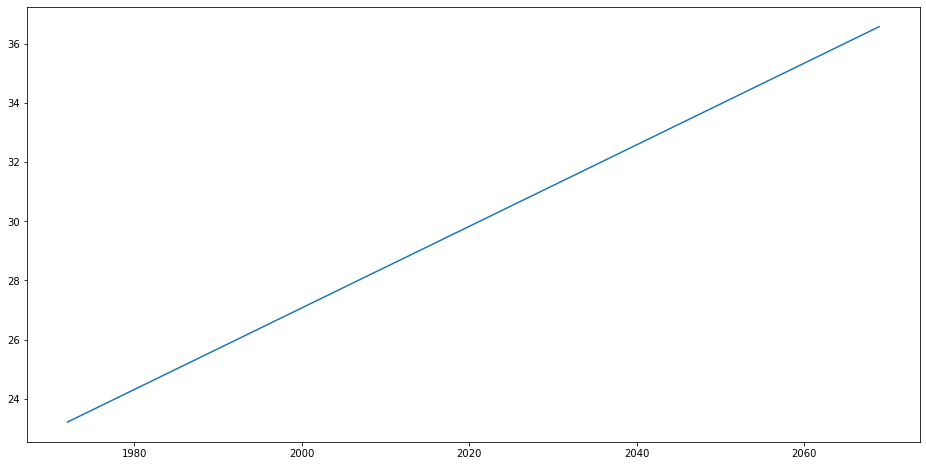

In [102]:
x = np.arange(1972, 2070)
plt.plot(x, a*x+b)
plt.show()
